# Twitter Analysis

In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
from dateutil import parser
import pytz
timezone = pytz.timezone("America/Los_Angeles")

In [4]:
influencer = pd.read_csv(r"./Berkeley influencers v2/ninaeyu_tweets.csv", encoding='UTF-8')

def clean_data(x):
    x = x[2:(len(x)-1)]
    return x
def is_rt(x):
    if 'RT' in x:
        return True
    else:
        return False
def get_hour(x):
    x = x - timezone.localize(parser.parse('8:00:00'))
    return x.seconds//3600
influencer['text'] = influencer.text.apply(clean_data)
influencer['RT'] = influencer.text.apply(is_rt)
influencer['dtime'] = influencer[['date', 'time']].apply(lambda x: ' '.join(x), axis=1)
influencer['date'] = influencer.date.apply(parser.parse)

influencer['dtime'] = influencer.dtime.apply(parser.parse)
influencer['la_dtime'] = influencer.dtime.apply(timezone.localize)
influencer['hour'] = influencer.la_dtime.apply(get_hour)
influencer = influencer.loc[~influencer['RT'],:]
influencer_sub = influencer[influencer['date']>=parser.parse('2018-01-01')]
influencer.head()
#influencer['la_dtime'] - timezone.localize(parser.parse('8:00:00'))

,id,date,time,text,retweet_count,favorite_count,favorited,retweeted,RT,dtime,la_dtime,hour
0,1059299792927375360,2018-11-05,04:22:06,"did i ,,, rly edit for 12 hrs nonstop today to...",3,139,False,False,False,2018-11-05 04:22:06,2018-11-05 04:22:06-08:00,20
1,1059100693657579520,2018-11-04,15:10:57,i\xe2\x80\x99m up at 7am ??? let\xe2\x80\x99s ...,16,344,False,False,False,2018-11-04 15:10:57,2018-11-04 15:10:57-08:00,7
2,1058931637910568960,2018-11-04,03:59:11,ily https://t.co/j9lTaYNYia,3,99,False,False,False,2018-11-04 03:59:11,2018-11-04 03:59:11-08:00,19
3,1058931486236135425,2018-11-04,03:58:34,I WAS EDITING BUT I JUST LISTENED TO IT I LOVE...,3,100,False,False,False,2018-11-04 03:58:34,2018-11-04 03:58:34-08:00,19
4,1058911396937650176,2018-11-04,02:38:45,oK GOT IT THANKS !! https://t.co/eJrVHHFNm0,0,75,False,False,False,2018-11-04 02:38:45,2018-11-04 02:38:45-08:00,18


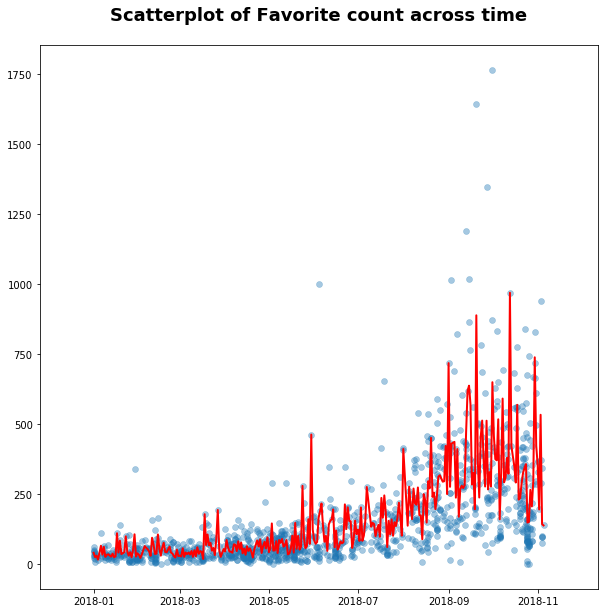

In [5]:
# favorite counts

fig, ax = plt.subplots(figsize = (10,10))
plt.style.use("bmh")

ax.scatter(influencer_sub['date'].values,influencer_sub['favorite_count'].values, alpha = 0.4)
# Find the average rating every years
daily = influencer_sub.groupby('date')['favorite_count'].mean()
ax.plot(daily, color = 'RED')

ax.set_title('Scatterplot of Favorite count across time', fontweight="bold", size=18, pad = 25)
# ax.set_xlabel('Year', size = 18)
# ax.set_ylabel('Critic Rating', size = 18)
plt.show()

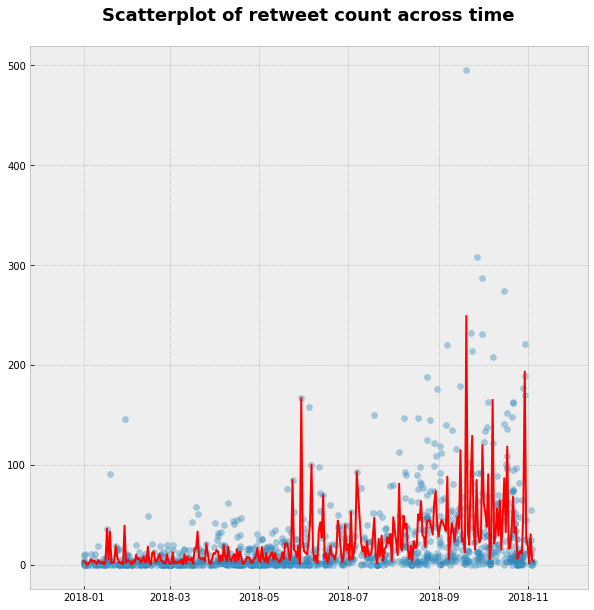

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
plt.style.use("bmh")

ax.scatter(influencer_sub['date'].values,influencer_sub['retweet_count'].values, alpha = 0.4)
# Find the average rating every years
daily = influencer_sub.groupby('date')['retweet_count'].mean()
ax.plot(daily, color = 'RED')
ax.set_title('Scatterplot of retweet count across time', fontweight="bold", size=18, pad = 25)
plt.show()

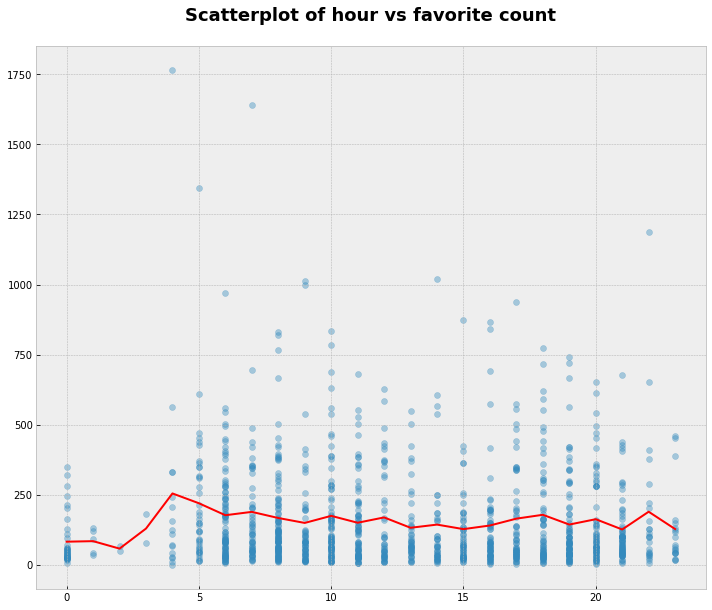

In [8]:
# WHat time work for her?

fig, ax = plt.subplots(figsize = (12,10))
plt.style.use("bmh")

ax.scatter(influencer_sub['hour'].values,influencer_sub['favorite_count'].values, alpha = 0.4)
# Find the average rating every years
daily = influencer_sub.groupby('hour')['favorite_count'].mean()
ax.plot(daily, color = 'RED')

ax.set_title('Scatterplot of hour vs favorite count', fontweight="bold", size=18, pad = 25)
plt.show()

In [36]:
google_search = pd.read_csv("websearch_12months.csv")
google_search['frequency'] = 5 * google_search['frequency']
google_search['week'] = google_search.week.apply(parser.parse)

youtube_search = pd.read_csv("youtube_12months.csv")
youtube_search['frequency'] = 5 * youtube_search['frequency']
youtube_search['day'] = youtube_search.day.apply(parser.parse)

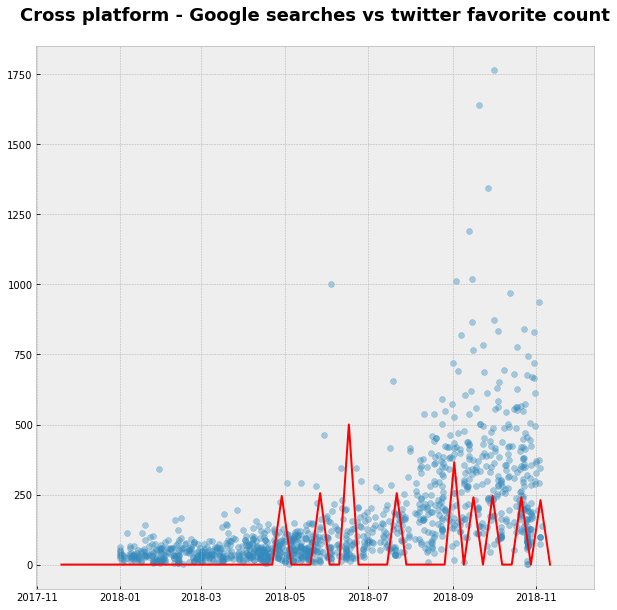

In [30]:
# Cross platform

fig, ax = plt.subplots(figsize = (10,10))
plt.style.use("bmh")

ax.scatter(influencer_sub['date'].values,influencer_sub['favorite_count'].values, alpha = 0.4)
# Find the average rating every years
#daily = google_search.groupby('week')['frequency'].mean()
ax.plot(google_search['week'], google_search['frequency'], color = 'RED')

ax.set_title('Cross platform - Google searches vs twitter favorite count', fontweight="bold", size=18, pad = 25)

plt.show()

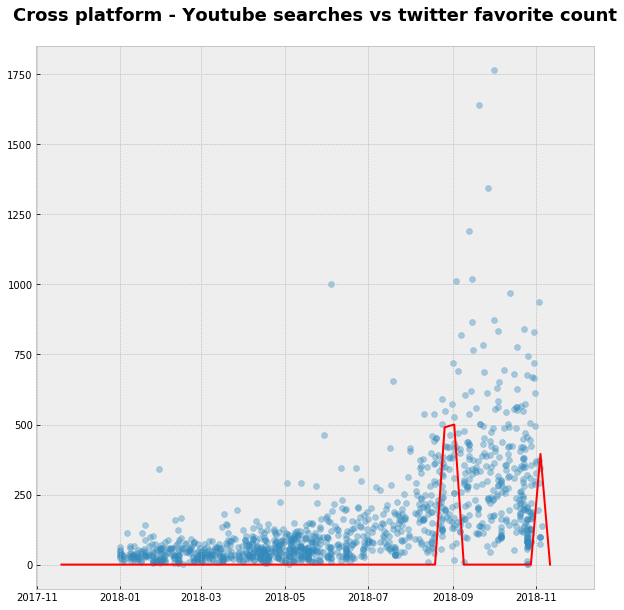

In [38]:
# Cross platform

fig, ax = plt.subplots(figsize = (10,10))
plt.style.use("bmh")

ax.scatter(influencer_sub['date'].values,influencer_sub['favorite_count'].values, alpha = 0.4)
# Find the average rating every years
#daily = google_search.groupby('week')['frequency'].mean()
ax.plot(youtube_search['day'], youtube_search['frequency'], color = 'RED')

ax.set_title('Cross platform - Youtube searches vs twitter favorite count', fontweight="bold", size=18, pad = 25)

plt.show()

## Digging into the tweets

In [46]:
influencer.loc[influencer.date=='2018-09-02',:].sort_values('favorite_count', ascending = False)

,id,date,time,text,retweet_count,favorite_count,favorited,retweeted,RT,dtime,la_dtime,hour
319,1036356608597487616,2018-09-02,20:54:04,person: *speaks in english* sorry for my engli...,49,526,False,False,False,2018-09-02 20:54:04,2018-09-02 20:54:04-07:00,11
318,1036358468737720320,2018-09-02,21:01:28,loving college living my best life rly thrivin...,84,434,False,False,False,2018-09-02 21:01:28,2018-09-02 21:01:28-07:00,12
327,1036114486371934208,2018-09-02,04:51:58,sometimes u just wanna be a stone,119,415,False,False,False,2018-09-02 04:51:58,2018-09-02 04:51:58-07:00,19
321,1036315562421276672,2018-09-02,18:10:58,me: *breathes*\n\nperson: ur personality is ve...,92,396,False,False,False,2018-09-02 18:10:58,2018-09-02 18:10:58-07:00,9
323,1036256714318786560,2018-09-02,14:17:08,me: *sees \xe2\x80\x9cjoonie\xe2\x80\x9d trend...,22,309,False,False,False,2018-09-02 14:17:08,2018-09-02 14:17:08-07:00,5
324,1036255391892426752,2018-09-02,14:11:52,jimin\xe2\x80\x99s high kick in the idol chore...,23,256,False,False,False,2018-09-02 14:11:52,2018-09-02 14:11:52-07:00,5
328,1036088061963063296,2018-09-02,03:06:58,for fun i used to write lyrics and one of them...,9,254,False,False,False,2018-09-02 03:06:58,2018-09-02 03:06:58-07:00,18
320,1036317419327782912,2018-09-02,18:18:21,i know myself,19,166,False,False,False,2018-09-02 18:18:21,2018-09-02 18:18:21-07:00,9
325,1036120847990153216,2018-09-02,05:17:15,our visual king https://t.co/nx0C0RHc10,4,141,False,False,False,2018-09-02 05:17:15,2018-09-02 05:17:15-07:00,20
326,1036120765882462209,2018-09-02,05:16:55,wow who is this cutie uwu https://t.co/lj7LLfzg1W,1,130,False,False,False,2018-09-02 05:16:55,2018-09-02 05:16:55-07:00,20


In [50]:
# Finding foodie 
foodie_berkeley = pd.read_csv('berkeley_food.csv')

foodie_berkeley['engagement'] = foodie_berkeley['favourites_count']/foodie_berkeley['followers_count']
foodie_berkeley.head()

foodie_berkeley.sort_values('engagement', ascending = False).head(10)

,id_str,name,screen_name,description,followers_count,friends_count,favourites_count,verified,location,url,created_at,statuses_count,engagement
7,1.687593e+08,Chase Roberts,chsrbrts,Okla to Dal to SF. BizDev at Segment. Former B...,539,671,3053,NaN,Bay Area,https://t.co/3sDMChF91f,Tue Jul 20 18:56:25 +0000 2010,3186,5.664193
10,3.037087e+07,KB,kbo_0,UC Berkeley 11’ | Former US Gymnastics Senior ...,166,328,520,NaN,"Bay Area, California",https://t.co/DAJdCPHJLN,Sat Apr 11 02:06:18 +0000 2009,3299,3.132530
4,2.748515e+08,Daren Fisher,gobears64,"Husband, Father, foodie, UC Berkeley alum and ...",1146,1231,3021,NaN,"Redding, CA",NaN,Thu Mar 31 04:19:47 +0000 2011,4327,2.636126
6,1.987653e+08,Jerry Lu 👨🏼‍🚀,thejerrylu,"vc @lux_capital, mba @wharton | prev @baidu_in...",935,778,1432,NaN,🇹🇼🇺🇸,https://t.co/LUTKls1DaS,Tue Oct 05 05:17:33 +0000 2010,3647,1.531551
11,8.733810e+17,Rachel Yakrus,DrYakrus,Inquisitive foodie gynecologist living in Berk...,554,2282,803,NaN,"Berkeley, CA",NaN,Sat Jun 10 03:26:31 +0000 2017,123,1.449458
2,3.446638e+07,Julie Luck | WFMY ✌🏼️,julie_luck,Award-winning @WFMY/@CBS anchor at 5/6/11pm | ...,10051,1188,11369,True,"NC home, CA born",https://t.co/mxmwtMS74x,Thu Apr 23 00:45:26 +0000 2009,36639,1.131131
8,2.534470e+07,Rohan Verma,rverma21,"Dropboxer, prev BizDev + Strategy at LNKD. Ber...",450,1228,369,NaN,"San Francisco, CA and Toronto",http://t.co/mt8mVdsFq0,Thu Mar 19 17:33:34 +0000 2009,1473,0.820000
1,2.820427e+09,Danielle Radin,danielleradin,Digital Correspondent with #NBC7 San Diego. #B...,10027,9791,4999,True,"San Diego, CA",https://t.co/5yHJ9EcmtC,Fri Sep 19 21:04:14 +0000 2014,7923,0.498554
13,6.169228e+07,Noah Enelow,nhenelow,"Berkeley native, Yale grad, UMass PhD; economi...",216,186,99,NaN,"Portland, OR",http://t.co/lz3eexcY,Fri Jul 31 04:35:26 +0000 2009,278,0.458333
3,2.284545e+09,My Berkeley Bowl,MyBerkeleyBowl,Exotic produce demystified--one original recip...,4577,2523,2035,NaN,"Berkeley, CA",https://t.co/yewkGWAF4B,Wed Jan 15 21:39:40 +0000 2014,370,0.444614


https://twitter.com/ninaeyu/status/1036358468737720320/photo/1
https://twitter.com/i/web/status/1036356608597487616